<a href="https://colab.research.google.com/github/NBK-code/Practice/blob/main/Practice_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Practice

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [49]:
df = pd.read_csv('/content/movie_metadata.csv')

In [50]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [51]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [52]:
df.isna().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

## 1-Variable Model

In [53]:
df_new = df[['movie_facebook_likes', 'imdb_score']]

In [54]:
df_new

,movie_facebook_likes,imdb_score
0,33000,7.9
1,0,7.1
2,85000,6.8
3,164000,8.5
4,0,7.1
...,...,...
5038,84,7.7
5039,32000,7.5
5040,16,6.3
5041,660,6.3


In [55]:
df_new.isna().sum()

movie_facebook_likes    0
imdb_score              0
dtype: int64

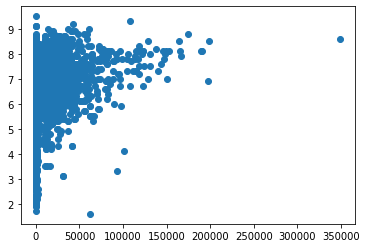

In [56]:
plt.scatter(df_new['movie_facebook_likes'], df_new['imdb_score'])

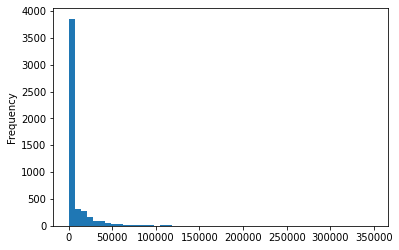

In [80]:
df['movie_facebook_likes'].plot(kind = 'hist', bins = 50)

In [57]:
X = df_new['movie_facebook_likes'].to_numpy().reshape(-1,1)
X.shape

(5043, 1)

In [58]:
y = df_new['imdb_score'].to_numpy()
y.shape

(5043,)

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [61]:
from xgboost import XGBRegressor

In [62]:
model = XGBRegressor()

In [63]:
model.fit(X_train, y_train)

[22:28:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [64]:
predictions = model.predict(X_test)

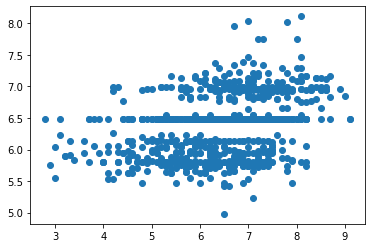

In [65]:
plt.scatter(y_test, predictions)

In [66]:
from sklearn.model_selection import RandomizedSearchCV

In [67]:
model2 = XGBRegressor()

In [68]:
hyperparameter_grid = {'n_estimators': [100, 200, 300],
                       'max_depth': [2, 4, 6, 8, 10],
                       'learning_rate': [0.0001, 0.001, 0.01]
                       }

In [69]:
random_cv = RandomizedSearchCV(model2,
                               param_distributions= hyperparameter_grid,
                               cv = 5)

In [70]:
random_cv.fit(X_train, y_train)

[22:28:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:28:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:28:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:28:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:28:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:28:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:28:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:28:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

RandomizedSearchCV(cv=5, estimator=XGBRegressor(),
                   param_distributions={'learning_rate': [0.0001, 0.001, 0.01],
                                        'max_depth': [2, 4, 6, 8, 10],
                                        'n_estimators': [100, 200, 300]})

In [71]:
random_cv.best_estimator_

XGBRegressor(learning_rate=0.01, max_depth=6)

In [72]:
xgb_regressor = XGBRegressor(learning_rate=0.01, max_depth=2, n_estimators=200)

In [73]:
xgb_regressor.fit(X_train, y_train)

[22:28:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.01, max_depth=2, n_estimators=200)

In [74]:
predictions = xgb_regressor.predict(X_test)

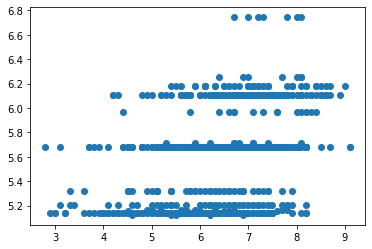

In [75]:
plt.scatter(y_test, predictions)

##2-Variable Model

In [83]:
df_2 = df[['movie_facebook_likes', 'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes', 'imdb_score']]

In [84]:
df_2

,movie_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,imdb_score
0,33000,1000.0,936.0,855.0,7.9
1,0,40000.0,5000.0,1000.0,7.1
2,85000,11000.0,393.0,161.0,6.8
3,164000,27000.0,23000.0,23000.0,8.5
4,0,131.0,12.0,NaN,7.1
...,...,...,...,...,...
5038,84,637.0,470.0,318.0,7.7
5039,32000,841.0,593.0,319.0,7.5
5040,16,0.0,0.0,0.0,6.3
5041,660,946.0,719.0,489.0,6.3


In [85]:
df_2.isna().sum()

movie_facebook_likes       0
actor_1_facebook_likes     7
actor_2_facebook_likes    13
actor_3_facebook_likes    23
imdb_score                 0
dtype: int64

In [89]:
df_2 = df_2.dropna()

In [90]:
df_2.isna().sum()

movie_facebook_likes      0
actor_1_facebook_likes    0
actor_2_facebook_likes    0
actor_3_facebook_likes    0
imdb_score                0
dtype: int64

In [91]:
df_2.mean()

movie_facebook_likes      7554.729681
actor_1_facebook_likes    6577.876693
actor_2_facebook_likes    1655.028287
actor_3_facebook_likes     645.009761
imdb_score                   6.440478
dtype: float64

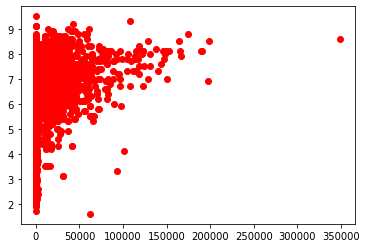

In [94]:
plt.scatter(df_2['movie_facebook_likes'], df_2['imdb_score'], c='red')

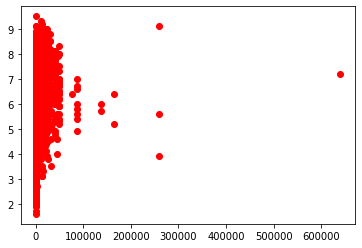

In [95]:
plt.scatter(df_2['actor_1_facebook_likes'], df_2['imdb_score'], c='red')

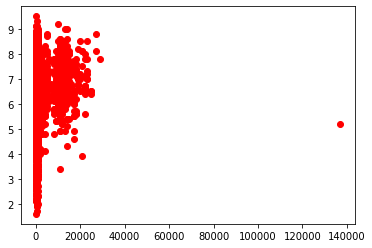

In [96]:
plt.scatter(df_2['actor_2_facebook_likes'], df_2['imdb_score'], c='red')

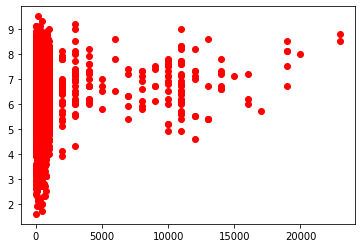

In [97]:
plt.scatter(df_2['actor_3_facebook_likes'], df_2['imdb_score'], c='red')

Each plot exhibits heteroscedasticity.

In [98]:
X = df_2[['movie_facebook_likes', 'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes']].to_numpy()

In [100]:
X.shape

(5020, 4)

In [101]:
y = df_2['imdb_score'].to_numpy()
y.shape

(5020,)

In [102]:
from sklearn.model_selection import train_test_split

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) 

In [111]:
X_test.shape

(1004, 4)

In [112]:
from sklearn.preprocessing import StandardScaler

In [113]:
scale = StandardScaler()

In [117]:
X_train = scale.fit_transform(X_train)

In [118]:
X_train

array([[-0.39247437, -0.30205835, -0.29799193, -0.37567773],
       [ 1.041813  ,  1.2832155 ,  2.83427671,  0.08297269],
       [-0.39247437, -0.39499503, -0.31227196, -0.14153357],
       ...,
       [ 0.22222022, -0.39611794, -0.36280128, -0.27646411],
       [-0.39247437,  0.75479088, -0.18649789,  0.18728873],
       [-0.39247437,  1.2832155 , -0.20105253,  0.01720823]])

In [119]:
X_test = scale.transform(X_test)

In [120]:
X_test

array([[-0.39247437, -0.37960467, -0.2644888 , -0.21183352],
       [-0.36261046, -0.39354187, -0.43475064, -0.32692132],
       [-0.39247437, -0.23600528,  0.08811798, -0.04118608],
       ...,
       [ 0.9393639 ,  0.22636626,  0.36273386,  0.09374445],
       [ 2.93712131,  0.95295012,  4.20735607,  6.42357385],
       [-0.39247437, -0.36982881, -0.29771732, -0.12395859]])

In [121]:
from xgboost import XGBRegressor

In [122]:
model2 = XGBRegressor()

In [123]:
from sklearn.model_selection import RandomizedSearchCV

In [124]:
hyperparameter_grid = {'n_estimators': [100, 200, 300, 400],
                       'max_depth': [2,4,6,8,10,12],
                       'learning_rate': [0.001, 0.01, 0.1, 0.5]}

In [126]:
random_cv = RandomizedSearchCV(model2,
                               param_distributions = hyperparameter_grid,
                               cv = 5)

In [127]:
random_cv.fit(X_train, y_train)

[23:36:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:36:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:36:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:36:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:36:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:36:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:36:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:36:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

RandomizedSearchCV(cv=5, estimator=XGBRegressor(),
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1,
                                                          0.5],
                                        'max_depth': [2, 4, 6, 8, 10, 12],
                                        'n_estimators': [100, 200, 300, 400]})

In [129]:
random_cv.best_estimator_

XGBRegressor(max_depth=6)

In [130]:
best_model = XGBRegressor(max_depth=6)

In [132]:
best_model.fit(X_train, y_train)

[23:39:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=6)

In [133]:
predictions = best_model.predict(X_test)

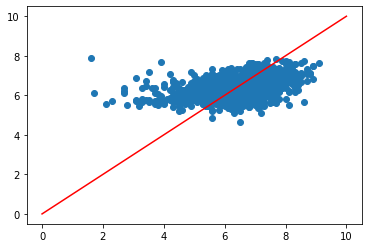

In [143]:
x_data = [0.0,10.0]
plt.scatter(y_test, predictions)
plt.plot(x_data, x_data, color = 'red', label = 'x=y')

In [141]:
mse = np.mean((predictions - y_test)**2)

In [142]:
mse

1.0871103910380875